# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
q=pd.read_csv('/content/Covid19.csv')
q.info()
q.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


# Working

In [22]:
#1)Show the number of Confirmed, Deaths and Recovered cases in each Region.
k=q.groupby('Region').sum()
k.columns
k.loc[:,k.columns!='Date']
k.loc[:,~k.columns.isin(['Date','State'])]
#~ -> excudes the thing

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [26]:
#2)Remove all the records where the Confirmed Cases is Less Than 10
q=q[q['Confirmed']>10]
q

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [33]:
#3)In which Region, maximum number of Confirmed cases were recorded ?
q.groupby('Region')['Confirmed'].max().sort_values(ascending=False).head(1)

,Confirmed
Region,
US,299691


In [34]:
#4)In which Region, minimum number of Deaths cases were recorded ?
q.groupby('Region')['Deaths'].min().sort_values(ascending=True).head(1)


,Deaths
Region,
Australia,0


In [51]:
#5)How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?
q['Date'].unique()
k=q[q['Region']=='India']
k.loc[:,['Confirmed','Deaths','Recovered']]

,Confirmed,Deaths,Recovered
74,33062,1079,8437


In [55]:
#6)Sort the entire data wrt No. of Confirmed cases in ascending order.
q.sort_values(by='Confirmed',ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
318,4/29/2020,Yukon,Canada,11,0,0
256,4/29/2020,Montserrat,UK,11,1,2
144,4/29/2020,NaN,Seychelles,11,0,6
217,4/29/2020,Greenland,Denmark,11,0,11
27,4/29/2020,NaN,Burundi,11,1,4
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


More the Cases more the ppl die


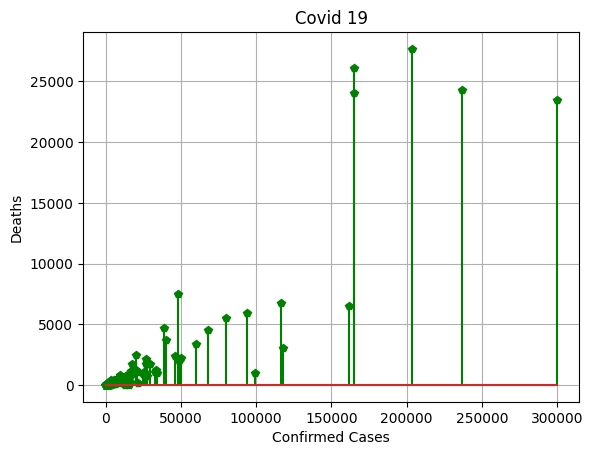

In [83]:
#7)Relation between Deaths and Confirmed cases
p=q['Deaths']
o=q['Confirmed']
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Covid 19')
plt.stem(o,p,linefmt='g',markerfmt='p')
print('More the Cases more the ppl die')
plt.grid()

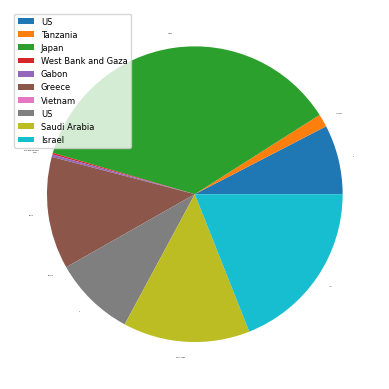

In [129]:
#8)What is the death share of the top 10 Regions
p=q['Confirmed'].sort_values(ascending=False).head(10).index
k=q.iloc[p]
plt.pie(k['Deaths'],labels=k['Region'],textprops={'fontsize':0.1})
plt.legend(loc=2,fontsize=6)

In [133]:
#9) Total number of cases from regions whose name starts with an A
q[q['Region'].str.contains('A')]['Confirmed'].sum()

np.int64(76215)

,State,Deaths
265,New York,23477
262,New Jersey,6771
251,Michigan,3670
249,Massachusetts,3405
278,Pennsylvania,2373
232,Illinois,2215
200,Connecticut,2169
195,California,1946
243,Louisiana,1845
208,Florida,1218


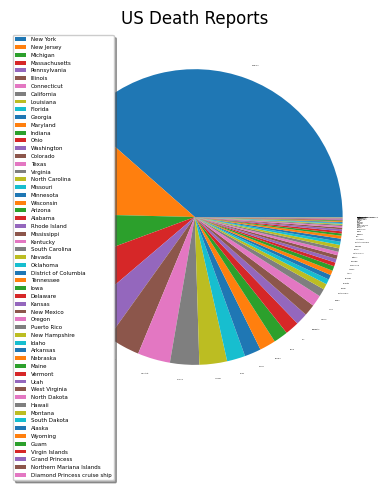

In [158]:
#10)What distribuion of Deaths was Recorded in The US.
k=q[q['Region']=='US']
k=k.sort_values('Deaths',ascending=False)
plt.pie(k['Deaths'],labels=k['State'],textprops={'fontsize':0.01})
k[['State','Deaths']]
plt.legend(loc=2,fontsize=4,shadow=True)
plt.title('US Death Reports')
k[['State','Deaths']]